<a href="https://www.kaggle.com/code/metin23/diabetes-prediction-0-88-eda-feature-engineerig?scriptVersionId=165917771" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  Feature Engineering for Diabetes Data Set

## About Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

![](https://static.toiimg.com/photo/96933578.cms)

[](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftimesofindia.indiatimes.com%2Flife-style%2Fhealth-fitness%2Fhealth-news%2Fdiabetes-symptoms-6-body-parts-that-can-signal-high-blood-sugar%2Fphotostory%2F96933546.cms&psig=AOvVaw1MzRt9YK3QAAZasY9b3nU0&ust=1709563682136000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCLCMyZSr2IQDFQAAAAAdAAAAABAD)

## Variables

**Pregnancies:** To express the Number of pregnancies

**Glucose:** To express the Glucose level in blood

**BloodPressure:** To express the Blood pressure measurement

**SkinThickness:** To express the thickness of the skin

**Insulin:** To express the Insulin level in blood

**BMI:** To express the Body mass index

**DiabetesPedigreeFunction:** To express the Diabetes percentage

**Age:** To express the age

**Outcome:** To express the final result 1 is Yes and 0 is No

# Table Contents
1. [General Information on Variables](#section-1)

2. [Importing the libraries¶](#section-2)

3. [EDA (Exploratory Data Analysis)](#section-3)

4. [Data Visualization¶)](#section-4)

5. [Feature Engineering](#section-5)

6. [Encoding Operations](#section-6)

7. [Modeling](#section-7)

8. [Result](#section-8)


<a id="section-1"></a>
## General Information on Variables¶


#### ***BloodPressure:*** 
 
**- Normal:** Systolic less than 120 and diastolic less than 80  
**- Elevated:** Systolic 120–129 and diastolic less than 80  
**- Hypertension stage 1**: Systolic 130–139 and diastolic 80–89  
**- Hypertension stage 2:** Systolic 140-plus and diastolic 90 or more   

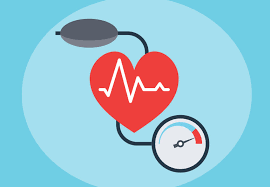

#### ***Adult Body Mass Index***

- If your BMI is **less than 18.5**, it falls within the **underweight** range.
- If your BMI is **18.5 to <25**, it falls within the **healthy weight** range.
- If your BMI is **25.0 to <30**, it falls within the **overweight** range.
- If your BMI is **30.0 or higher,** it falls within the **obesity** range.

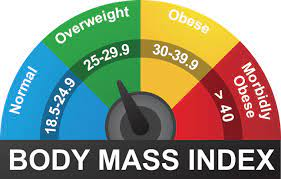

 #### ***Glucose Tolerance***

- **Normal:**  less than 140 mg/dL

- **Impaired :** 140 to 200 mg/dL

- **Abnormal (Diagnostic):**  Tw greater than 200 mg/dL

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSaY3jH1zSMmUAWgOXzdCJ38knq4-acC0Cx-g&usqp=CAU)

# Importing the libraries¶
<a id="section-2"></a>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

In [2]:
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

#  EDA (Exploratory Data Analysis)
<a id="section-3"></a>


In [3]:
df_=pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
df=df_.copy()

In [4]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### NA #####################
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
##################### Quantiles #####################
                           count    mean     std    min     0%     5%     50%     95%     99%    100%     max
Pregnancies              768.000   3.845   3.370  0.000  0.

### Let's find and analyze numerical and categorical variables.

In [7]:
for col in df.columns:
    print(col,":",df[col].nunique())
    print("######################")

Pregnancies : 17
######################
Glucose : 136
######################
BloodPressure : 47
######################
SkinThickness : 51
######################
Insulin : 186
######################
BMI : 248
######################
DiabetesPedigreeFunction : 517
######################
Age : 52
######################
Outcome : 2
######################


In [8]:
num_cols = [col for col in df.columns if col!="Outcome"]

In [9]:
num_but_cat = [col for col in df.columns if (df[col].nunique() < 20 and col!="Outcome") ]
num_but_cat

['Pregnancies']

### Let's do target variable analysis. Average of the target variable according to categorical variables, average of numerical variables according to the target variable.


In [10]:
def target_num(dataframe, target, num_cols):
    for col in num_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        
    print("\n\n",dataframe.groupby(target)[num_cols].mean())

In [11]:
target_num(df,"Outcome",num_cols)

Pregnancies : 17
Glucose : 136
BloodPressure : 47
SkinThickness : 51
Insulin : 186
BMI : 248
DiabetesPedigreeFunction : 517
Age : 52


          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age
Outcome                                                                                                     
0              3.298  109.980         68.184         19.664   68.792 30.304                     0.430 31.190
1              4.866  141.257         70.825         22.164  100.336 35.143                     0.550 37.067


## Data Visualization¶
<a id="section-4"></a>


### Let's do an outlier observation analysis


By combining two plots, *boxplot* and *stripplot*, a visualization is obtained that shows the distribution of points on the box plot. The box plot shows overall trends and distribution, while the strip chart shows individual data points. This type of combination comes in handy for understanding trends and outliers in the data set.

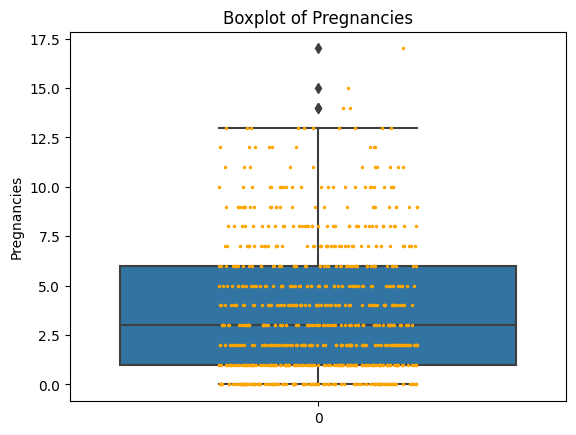

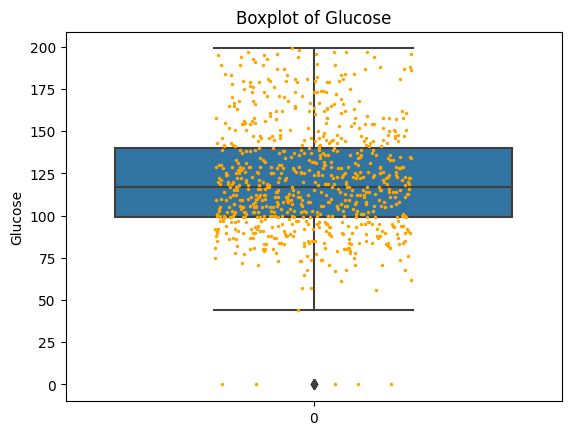

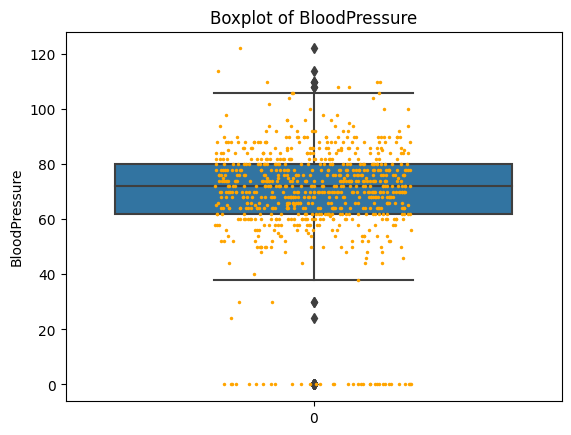

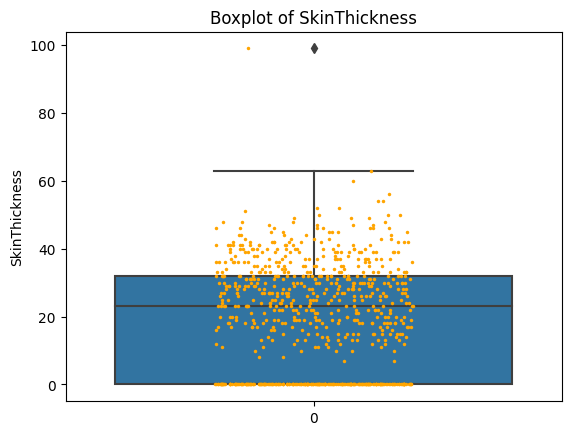

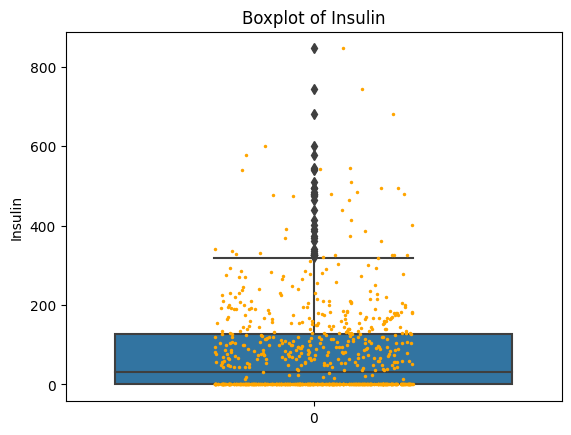

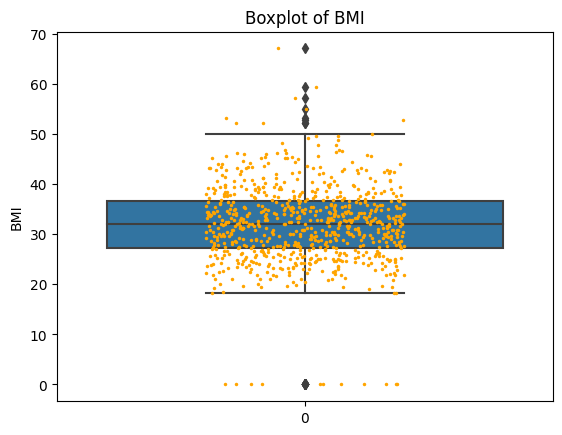

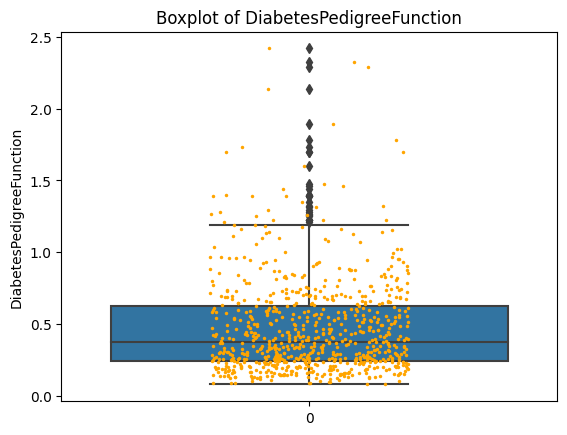

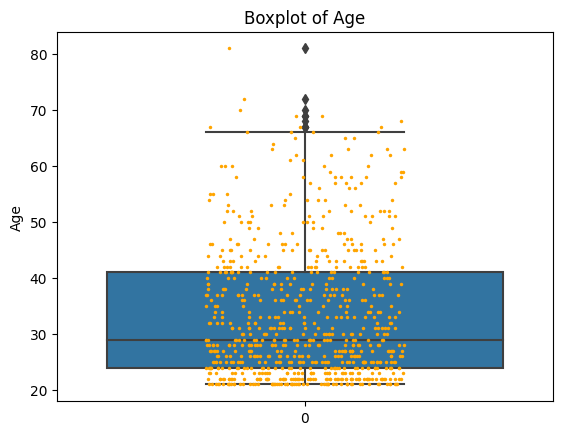

In [12]:
for col in num_cols:
    ax =sns.boxplot( data=df[col])
    ax =sns.stripplot(  data=df[col], color="orange", jitter=0.2, size=2.5)
    plt.title(f'Boxplot of {col}')
    plt.show()

### Let's do a missing observation analysis.

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Let's do a correlation analysis.

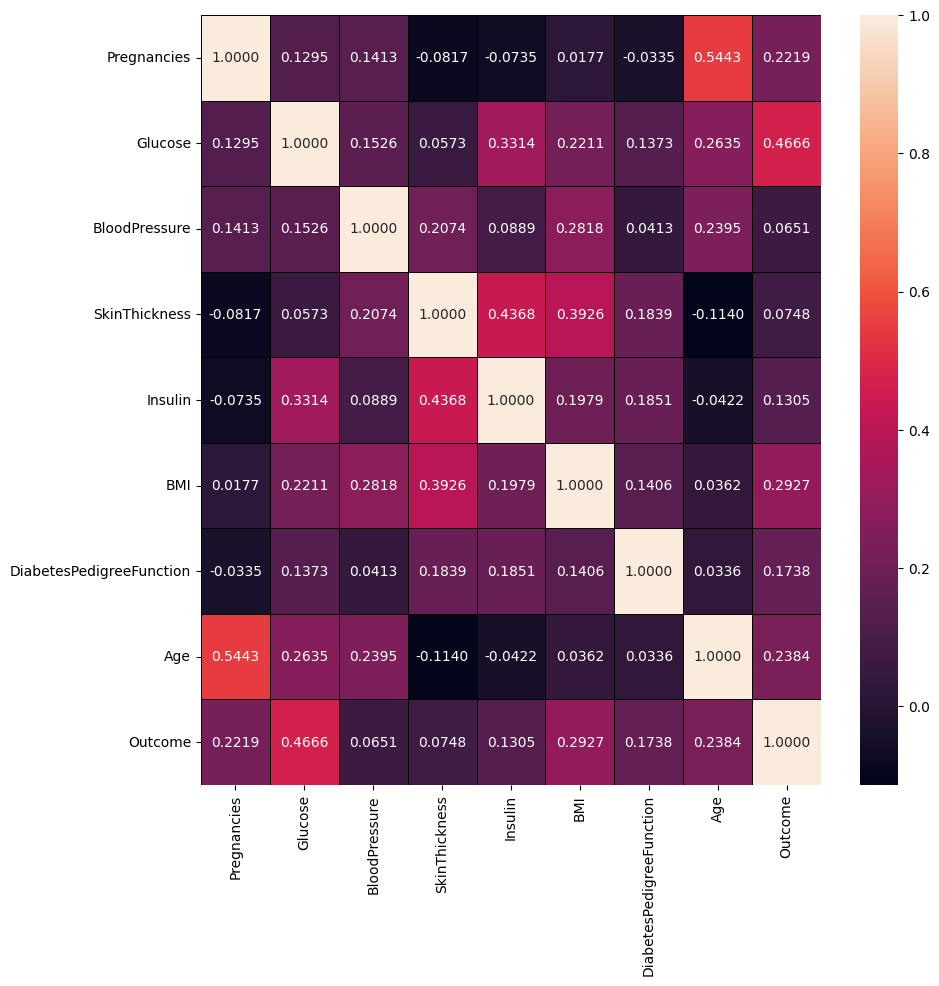

In [14]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

#  Feature Engineering
<a id="section-5"></a>

Take the necessary action for missing and outlier values.
<br> There are no missing observations in the data set, but Glucose, Insulin etc. Observation units containing 0 values in variables may represent missing values.<br>
For example; A person's glucose or insulin value will not be 0.
<br> Taking this situation into consideration, you can assign zero values as NaN in the relevant values and then apply the operations to the missing values.

In [15]:
missing= ["Glucose","BloodPressure","SkinThickness","Insulin","BMI" ]      

In [16]:
df[missing] = df[missing].replace(0, np.NaN)

In [17]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
#for col in missing:
#    df[col]=df[col].fillna(df.groupby("Outcome")[col].transform("mean")

In [19]:
for col in missing:
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = df[df["Outcome"]==0][col].median()
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = df[df["Outcome"]==1][col].median()

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [22]:
def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
 

In [23]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """
  # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


In [24]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [25]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [26]:
for col in num_cols:
    replace_with_thresholds(df, col)

for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


### Let's create new variables.

In [27]:
df['Age_new'] = pd.cut(x=df['Age'], bins=[20,29,45,max(df["Age"])],labels = ["young","mature","senior"])

df["BMI_new"] = pd.cut(x=df['BMI'], bins=[min(df["BMI"])-1,18.5,25,30,max(df["BMI"])],labels = ["underweight","weight","overweight","obese"])

df["Glucose_new"] = pd.cut(x=df['Glucose'], bins=[min(df["Glucose"])-1,140,max(df["Glucose"])],labels = ["normal","abnormal"])

df["BloodPressure_new"] = pd.cut(x=df['BloodPressure'], bins=[min(df["BloodPressure"])-1,80,90,max(df["BloodPressure"])],labels = ["normal","Hypertension_Stage_1","Hypertension_Stage_2"])


In [28]:
df["Glucose_Insulin "]=df["Glucose"]*df["Insulin"]
df["Insulin_BMI"]=df["Insulin"]*df["BMI"]
df["Glucose_BloodPressure"]= df["Glucose"]* df["BloodPressure"]
df["Insulin_BloodPressure"]= df["Insulin"]*df["BloodPressure"]

In [29]:
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="underweight"),"AGE_BMI"]="matureUnderWeight"
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="weight"),"AGE_BMI"]="matureWeight"
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="overweight"),"AGE_BMI"]="matureOverweight"
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="obese"),"AGE_BMI"]="matureObese"

df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="underweight"),"AGE_BMI"]="youngUnderWeight"
df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="weight"),"AGE_BMI"]="youngWeight"
df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="overweight"),"AGE_BMI"]="youngOverweight"
df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="obese"),"AGE_BMI"]="youngObese"

df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="underweight"),"AGE_BMI"]="seniorUnderweight"
df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="weight"),"AGE_BMI"]="seniorWeight"
df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="overweight"),"AGE_BMI"]="seniorOverweight"
df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="obese"),"AGE_BMI"]="seniorObese"

In [30]:
df.loc[(df["Age_new"]=="mature") & (df["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="matureNormal"
df.loc[(df["Age_new"]=="mature") & (df["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="matureHypertension_Stage_1"
df.loc[(df["Age_new"]=="mature") & (df["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="matureHypertension_Stage_2"


df.loc[(df["Age_new"]=="young") & (df["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="youngNormal"
df.loc[(df["Age_new"]=="young") & (df["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="youngHypertension_Stage_1"
df.loc[(df["Age_new"]=="young") & (df["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="youngHypertension_Stage_2"

df.loc[(df["Age_new"]=="senior") & (df["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="seniorNormal"
df.loc[(df["Age_new"]=="senior") & (df["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="seniorHypertension_Stage_1"
df.loc[(df["Age_new"]=="senior") & (df["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="seniorHypertension_Stage_2"

In [31]:
df.loc[(df["Age_new"]=="mature") & (df["Glucose_new"]=="normal"),"Age_Glucose"]="matureNormal"
df.loc[(df["Age_new"]=="mature") & (df["Glucose_new"]=="abnormal"),"Age_Glucose"]="matureAbnormal"

df.loc[(df["Age_new"]=="young") & (df["Glucose_new"]=="normal"),"Age_Glucose"]="youngNormal"
df.loc[(df["Age_new"]=="young") & (df["Glucose_new"]=="abnormal"),"Age_Glucose"]="youngabnormal"

df.loc[(df["Age_new"]=="senior") & (df["Glucose_new"]=="normal"),"Age_Glucose"]="seniorNormal"
df.loc[(df["Age_new"]=="senior") & (df["Glucose_new"]=="abnormal"),"Age_Glucose"]="seniorAbnormal"


In [32]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_new,BMI_new,Glucose_new,BloodPressure_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI,AGE_BloodPressure,Age_Glucose
0,6.000,148.000,72.000,35.000,169.500,33.600,0.627,50,1,senior,obese,abnormal,normal,25086.000,5695.200,10656.000,12204.000,seniorObese,seniorNormal,seniorAbnormal
1,1.000,85.000,66.000,29.000,102.500,26.600,0.351,31,0,mature,overweight,normal,normal,8712.500,2726.500,5610.000,6765.000,matureOverweight,matureNormal,matureNormal
2,8.000,183.000,64.000,32.000,169.500,23.300,0.672,32,1,mature,weight,abnormal,normal,31018.500,3949.350,11712.000,10848.000,matureWeight,matureNormal,matureAbnormal
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,overweight,normal,normal,8366.000,2641.400,5874.000,6204.000,youngOverweight,youngNormal,youngNormal
4,0.000,137.000,40.000,35.000,168.000,43.100,1.603,33,1,mature,obese,normal,normal,23016.000,7240.800,5480.000,6720.000,matureObese,matureNormal,matureNormal
5,5.000,116.000,74.000,27.000,102.500,25.600,0.201,30,0,mature,overweight,normal,normal,11890.000,2624.000,8584.000,7585.000,matureOverweight,matureNormal,matureNormal
6,3.000,78.000,50.000,32.000,88.000,31.000,0.248,26,1,young,obese,normal,normal,6864.000,2728.000,3900.000,4400.000,youngObese,youngNormal,youngNormal
7,10.000,115.000,70.000,27.000,102.500,35.300,0.134,29,0,young,obese,normal,normal,11787.500,3618.250,8050.000,7175.000,youngObese,youngNormal,youngNormal
8,2.000,197.000,70.000,45.000,320.675,30.500,0.158,53,1,senior,obese,abnormal,normal,63172.975,9780.587,13790.000,22447.250,seniorObese,seniorNormal,seniorAbnormal
9,8.000,125.000,96.000,32.000,169.500,34.300,0.232,54,1,senior,obese,normal,Hypertension_Stage_2,21187.500,5813.850,12000.000,16272.000,seniorObese,seniorHypertension_Stage_2,seniorNormal


In [33]:
df.shape

(768, 20)

In [34]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols=[ col for col in cat_cols if col != "OUTCOME"]

Observations: 768
Variables: 20
cat_cols: 8
num_cols: 12
cat_but_car: 0
num_but_cat: 5


# Encoding Operations
<a id="section-6"></a>

In [35]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df,col)

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_new,BMI_new,Glucose_new,BloodPressure_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI,AGE_BloodPressure,Age_Glucose
0,6.000,148.000,72.000,35.000,169.500,33.600,0.627,50,1,senior,obese,0,normal,25086.000,5695.200,10656.000,12204.000,seniorObese,seniorNormal,seniorAbnormal
1,1.000,85.000,66.000,29.000,102.500,26.600,0.351,31,0,mature,overweight,1,normal,8712.500,2726.500,5610.000,6765.000,matureOverweight,matureNormal,matureNormal
2,8.000,183.000,64.000,32.000,169.500,23.300,0.672,32,1,mature,weight,0,normal,31018.500,3949.350,11712.000,10848.000,matureWeight,matureNormal,matureAbnormal
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,overweight,1,normal,8366.000,2641.400,5874.000,6204.000,youngOverweight,youngNormal,youngNormal
4,0.000,137.000,40.000,35.000,168.000,43.100,1.603,33,1,mature,obese,1,normal,23016.000,7240.800,5480.000,6720.000,matureObese,matureNormal,matureNormal


In [37]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cat_cols = [col for col in cat_cols if col not in binary_cols]

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI_matureOverweight,AGE_BMI_matureWeight,AGE_BMI_seniorObese,AGE_BMI_seniorOverweight,AGE_BMI_seniorWeight,AGE_BMI_youngObese,AGE_BMI_youngOverweight,AGE_BMI_youngUnderWeight,AGE_BMI_youngWeight,AGE_BloodPressure_matureHypertension_Stage_2,AGE_BloodPressure_matureNormal,AGE_BloodPressure_seniorHypertension_Stage_1,AGE_BloodPressure_seniorHypertension_Stage_2,AGE_BloodPressure_seniorNormal,AGE_BloodPressure_youngHypertension_Stage_1,AGE_BloodPressure_youngHypertension_Stage_2,AGE_BloodPressure_youngNormal,Age_Glucose_matureNormal,Age_Glucose_seniorAbnormal,Age_Glucose_seniorNormal,Age_Glucose_youngNormal,Age_Glucose_youngabnormal,Age_new_mature,Age_new_senior,BMI_new_weight,BMI_new_overweight,BMI_new_obese,BloodPressure_new_Hypertension_Stage_1,BloodPressure_new_Hypertension_Stage_2
0,6.000,148.000,72.000,35.000,169.500,33.600,0.627,50,1,0,25086.000,5695.200,10656.000,12204.000,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False
1,1.000,85.000,66.000,29.000,102.500,26.600,0.351,31,0,1,8712.500,2726.500,5610.000,6765.000,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
2,8.000,183.000,64.000,32.000,169.500,23.300,0.672,32,1,0,31018.500,3949.350,11712.000,10848.000,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21,0,1,8366.000,2641.400,5874.000,6204.000,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4,0.000,137.000,40.000,35.000,168.000,43.100,1.603,33,1,1,23016.000,7240.800,5480.000,6720.000,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


### Let's standardize for numerical variables.

In [39]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])
df[num_cols].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure
0,0.600,0.765,0.000,1.000,1.000,0.170,0.665,1.235,0.850,0.647,0.531,0.626
1,-0.400,-0.790,-0.375,0.143,0.000,-0.599,-0.056,0.118,-0.410,-0.330,-0.653,-0.270
2,1.000,1.630,-0.500,0.571,1.000,-0.962,0.783,0.176,1.307,0.072,0.779,0.403
3,-0.400,-0.691,-0.375,-0.714,-0.127,-0.434,-0.537,-0.471,-0.437,-0.358,-0.591,-0.363
4,-0.600,0.494,-2.000,1.000,0.978,1.214,3.218,0.235,0.691,1.155,-0.683,-0.278


In [40]:
# ss = StandardScaler()
# df[num_cols] = ss.fit_transform(df[num_cols])
# df[num_cols].head()

In [41]:
# mms = MinMaxScaler()
# df[num_cols] = mms.fit_transform(df[num_cols])
# df[num_cols].head()

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI_matureOverweight,AGE_BMI_matureWeight,AGE_BMI_seniorObese,AGE_BMI_seniorOverweight,AGE_BMI_seniorWeight,AGE_BMI_youngObese,AGE_BMI_youngOverweight,AGE_BMI_youngUnderWeight,AGE_BMI_youngWeight,AGE_BloodPressure_matureHypertension_Stage_2,AGE_BloodPressure_matureNormal,AGE_BloodPressure_seniorHypertension_Stage_1,AGE_BloodPressure_seniorHypertension_Stage_2,AGE_BloodPressure_seniorNormal,AGE_BloodPressure_youngHypertension_Stage_1,AGE_BloodPressure_youngHypertension_Stage_2,AGE_BloodPressure_youngNormal,Age_Glucose_matureNormal,Age_Glucose_seniorAbnormal,Age_Glucose_seniorNormal,Age_Glucose_youngNormal,Age_Glucose_youngabnormal,Age_new_mature,Age_new_senior,BMI_new_weight,BMI_new_overweight,BMI_new_obese,BloodPressure_new_Hypertension_Stage_1,BloodPressure_new_Hypertension_Stage_2
0,0.600,0.765,0.000,1.000,1.000,0.170,0.665,1.235,1,0,0.850,0.647,0.531,0.626,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False
1,-0.400,-0.790,-0.375,0.143,0.000,-0.599,-0.056,0.118,0,1,-0.410,-0.330,-0.653,-0.270,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
2,1.000,1.630,-0.500,0.571,1.000,-0.962,0.783,0.176,1,0,1.307,0.072,0.779,0.403,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3,-0.400,-0.691,-0.375,-0.714,-0.127,-0.434,-0.537,-0.471,0,1,-0.437,-0.358,-0.591,-0.363,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4,-0.600,0.494,-2.000,1.000,0.978,1.214,3.218,0.235,1,1,0.691,1.155,-0.683,-0.278,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


# Modeling
<a id="section-7"></a>

In [43]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Random Forest Classifier

In [44]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_1 = rf_model.predict(X_test)
rf_accuracy= accuracy_score(y_pred_1, y_test)
rf_accuracy

0.8744588744588745

### Light Gradient Boosting Machine Classifier

In [45]:
from lightgbm import LGBMClassifier

lgbm_model= LGBMClassifier(verbosity=-1)
lgbm_model.fit(X_train, y_train)
y_pred_2 =lgbm_model.predict(X_test)
lgbm_accuracy= accuracy_score(y_pred_2, y_test) 
lgbm_accuracy

0.8614718614718615

### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
des_model = DecisionTreeClassifier()
des_model.fit(X_train, y_train)
y_pred_2 = des_model.predict(X_test)
decison_sonuc = accuracy_score(y_pred_2, y_test)
decison_sonuc

0.8571428571428571

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_3 = log_model.predict(X_test)
logistic_sonuc = accuracy_score(y_pred_3, y_test)
logistic_sonuc

0.7965367965367965

### Extreme Gradient Boosting Classifier

In [49]:
from xgboost import XGBClassifier

xgm_model= XGBClassifier()
xgm_model.fit(X_train, y_train)
y_pred_4 =xgm_model.predict(X_test)
xgb= accuracy_score(y_pred_4, y_test)  
xgb

0.8658008658008658

### K-Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_6 =knn_model.predict(X_test)
knn= accuracy_score(y_pred_6, y_test) # 0.84
knn

0.8268398268398268

In [51]:
models= [rf_model,lgbm_model,des_model,log_model,xgm_model]

best_model = None
best_accuracy = 0

for i, model in enumerate(models,1):
    model.fit(X_train, y_train)
    y_pred_i= model.predict(X_test)
    accuracy_score_model=accuracy_score(y_pred_i, y_test)
    
    print(f'Model Name: {type(model).__name__}, Accuracy: {accuracy_score_model}\n')
    
    print("#"*80)
    
    if accuracy_score_model> best_accuracy:
        best_accuracy=accuracy_score_model
        best_model = model
        
print(f"Best Model {best_model}, Best Accuracy {best_accuracy}")

Model Name: RandomForestClassifier, Accuracy: 0.8614718614718615

################################################################################
Model Name: LGBMClassifier, Accuracy: 0.8614718614718615

################################################################################
Model Name: DecisionTreeClassifier, Accuracy: 0.8528138528138528

################################################################################
Model Name: LogisticRegression, Accuracy: 0.7965367965367965

################################################################################
Model Name: XGBClassifier, Accuracy: 0.8658008658008658

################################################################################
Best Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=Non

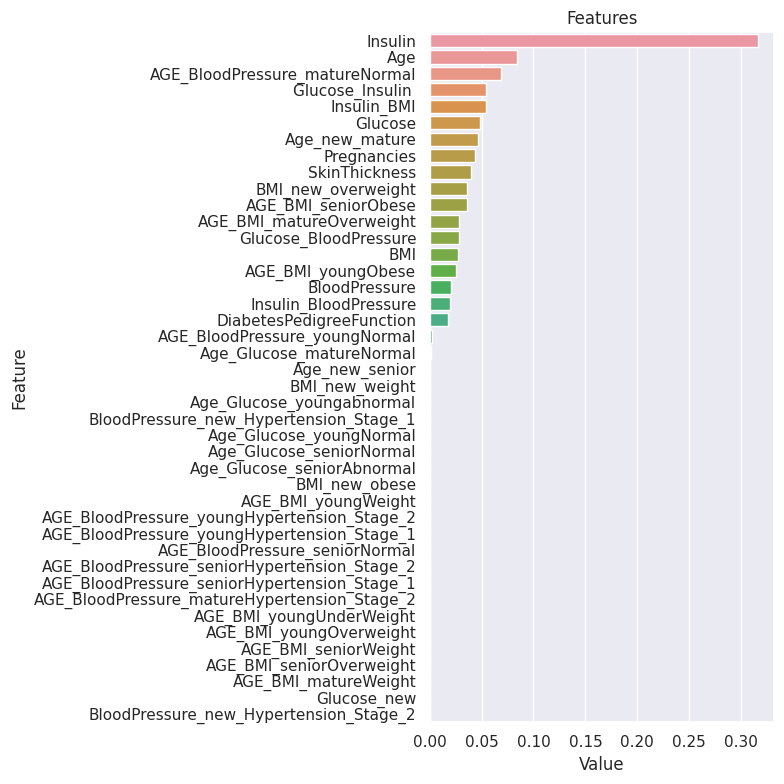

In [52]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(best_model, X_train)

# Result 
<a id="section-8"></a>

#### I analyzed the diabetes data set and observed its variables. I examined the presence of outliers in the variables using boxplot and stripplot graphs. Then I looked at the heatmap graph. It is not appropriate for a human to set the minimum value of glucose and insulin variables to be zero during the Feature Engineering phase. So I created an outlier by substituting that value with NaN, then filtered the outliers and converted the categorical variables to numeric format using one-hot coding. 

#### After standardizing the data, I created six different models. these are Decision Tree Classifier, Logistic Regression, Extreme Gradient Boosting Classifier, K-Nearest Neighbors, Light Gradient Boosting Machine Classifier and Random Forest Classifier. I showed the graphic value of the model that gives the best results.